In [1]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)


In [2]:
X_b = np.c_[np.ones((100,1)), X]

In [3]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.96768042],
       [2.97916362]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [5]:
y_predict

array([[3.96768042],
       [9.92600766]])

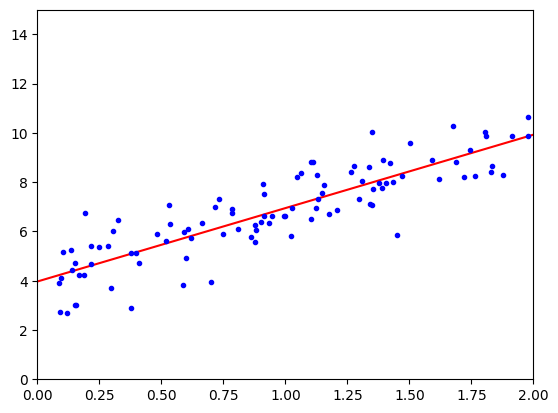

In [6]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.96768042]), array([[2.97916362]]))

In [8]:
theta_best_svd, residual, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.96768042],
       [2.97916362]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.96768042],
       [2.97916362]])

In [11]:
eta = 0.1 #learning rate
n_iterations = 1000
m=100

theta = np.random.randn(2,1)

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

theta

array([[3.96768042],
       [2.97916362]])

In [14]:
# Simple example of SGD with 50 iterations
n_epochs = 50
t0, t1 = 5, 50

def learning_sechdule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_sechdule(epoch * m + i)
        theta = theta - eta * gradients


In [15]:
theta

array([[3.95520351],
       [2.96852538]])

In [18]:
# using sklearn SGD regressor
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # ravel converts n-d array to 1-d array with n values
sgd_reg.intercept_, sgd_reg.coef_

(array([3.98610424]), array([3.01046971]))

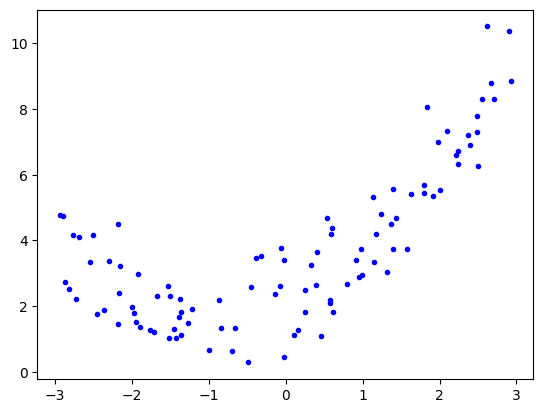

In [31]:
# Polynomial Regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")


In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) #Convert second degree polynomial to one feature
X_poly = poly_features.fit_transform(X)
X[0]

array([1.58163476])

In [33]:
X_poly[0]

array([1.58163476, 2.50156853])

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.11583754]), array([[0.98988775, 0.53173112]]))

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

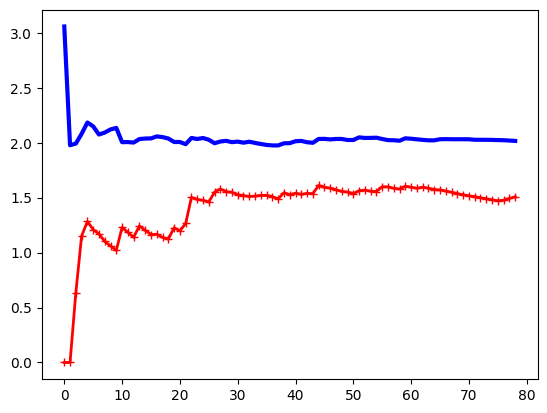

In [41]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

(0.0, 80.0, 0.0, 3.0)

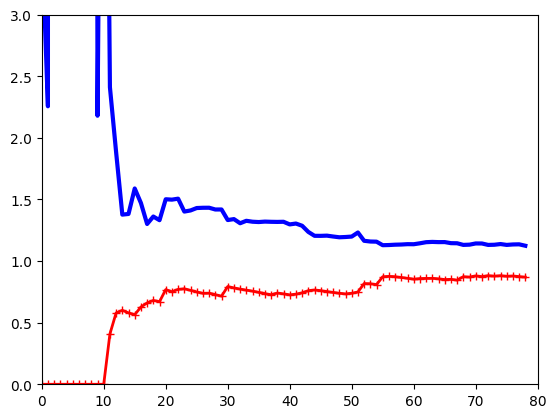

In [43]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3]) 